# Image Compression Using SVD
Low rank approximations of a matrix $A$ can be found by the singular value decomposition: $A=U\Sigma V^\top$. Particularly, rank-$i$ approximations can be found with

$$
\hat{A_i}=\sum_{i=1}^r \sigma_i\mathbf{u}_i\mathbf{v}_i^\top
$$

Here, images are represented as matrices, and the approximations can be interpreted as lossy image compression

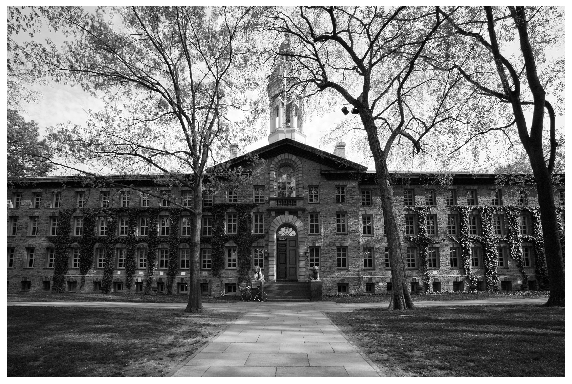

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load full image in RGB
im_pre = cv2.imread("image.jpg")

# Convert to grayscale by taking mean of RGB
im = np.mean(im_pre, axis=2)
plt.figure(figsize = (10,10))
fig = plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

In [2]:
# Compute the SVD
u, s, vh = np.linalg.svd(im)

In [3]:
# Approximation function
def approx(r):
    approx_im = np.zeros(im.shape)
    for i in range(r):
        ui = u[:,i]
        vi = vh[i]
        approx_im += s[i] * np.outer(ui, vi)
    return approx_im

5, 10, 25, 50-rank approximations: 

In [4]:
a1, a5, a10, a25, a50, a100 = approx(1), approx(5), approx(10), approx(25), approx(50), approx(100)

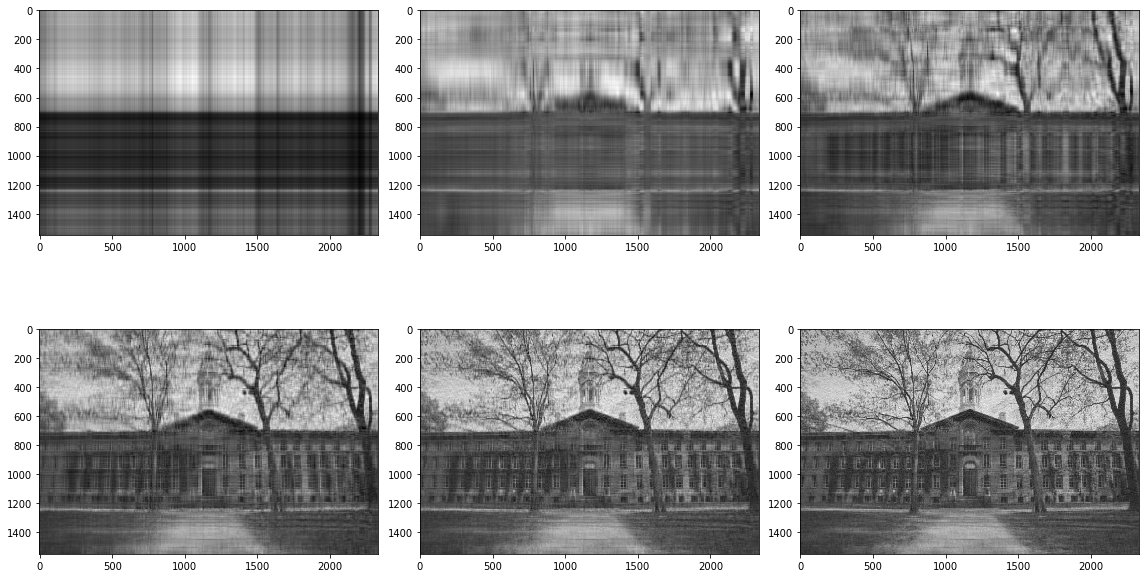

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
fig.tight_layout()
axs[0,0].imshow(a1, cmap='gray')
axs[0,1].imshow(a5, cmap='gray')
axs[0,2].imshow(a10, cmap='gray')
axs[1,0].imshow(a25, cmap='gray')
axs[1,1].imshow(a50, cmap='gray')
axs[1,2].imshow(a100, cmap='gray')
plt.show()